In [50]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [51]:
def func(x, m, c):  # this is a 'straight line'
    return m*x + c

# def func(x, A, B):
#     return A/(np.sin(0.5*0.0174532925199*(x-B))**4)

In [52]:
xs = np.array([343, 344, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690])
ys = np.array([0, 2342, 4268, 4910, 4886, 5081, 5043, 5287, 5220, 5228, 5355, 5337, 9483, 10244])

In [53]:
popt, pcov = curve_fit(func, xs[3:-2], ys[3:-2])
# popt = [0.000109843, -0.00126324]

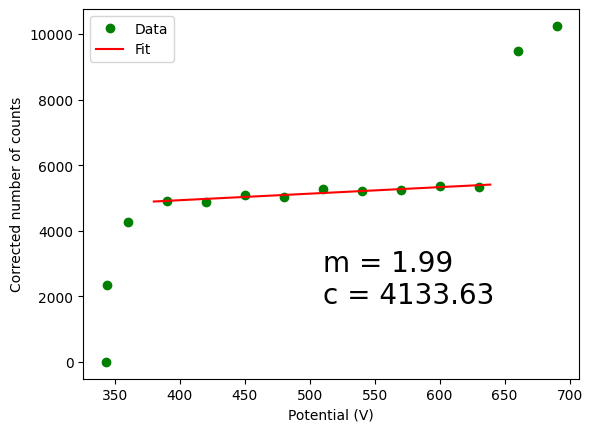

In [54]:
xFit = np.arange(380, 640, 1)
plt.plot(xs, ys, 'go', label='Data')
plt.plot(xFit, func(xFit, *popt), 'r', label='Fit')

text = f"""
m = {popt[0]:.2f}
c = {popt[1]:.2f}
"""
plt.text(0.5, 0.2, text, fontsize=20, transform=plt.gcf().transFigure)
plt.xlabel(r'Potential (V)')
plt.ylabel(r'Corrected number of counts')
plt.legend()

## Inverse Square

In [55]:
d = np.array([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 7.0])
R = np.array([9904, 7239, 5261, 3957, 3066, 2403, 1866, 1504, 1266, 912])/60

xs = np.log(d)
ys = np.log(R)

In [56]:
popt, pcov = curve_fit(func, xs, ys)

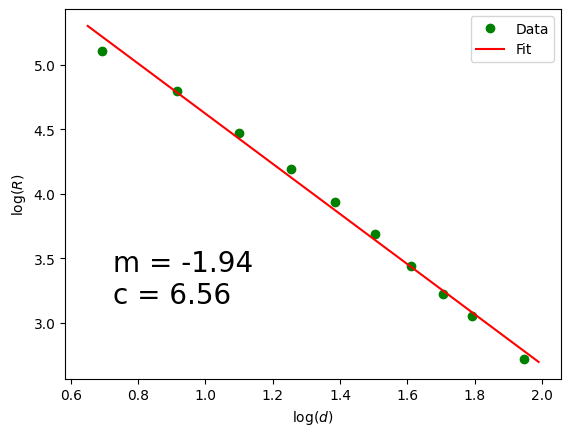

In [61]:
xFit = np.arange(0.65, 2, 0.01)
plt.plot(xs, ys, 'go', label='Data')
plt.plot(xFit, func(xFit, *popt), 'r', label='Fit')

text = f"""
m = {popt[0]:.2f}
c = {popt[1]:.2f}
"""
plt.text(0.2, 0.2, text, fontsize=20, transform=plt.gcf().transFigure)
plt.xlabel(r'$\log(d)$')
plt.ylabel(r'$\log(R)$')
plt.legend()

In [62]:
import math

def calculate_activity(A0, t_half, t):
    """Calculate the current activity of a material given its initial activity, half-life, and time elapsed."""
    
    # calculate the decay constant
    decay_constant = math.log(2) / t_half
    
    # calculate the current activity
    current_activity = A0 * math.exp(-decay_constant * t)
    
    return current_activity


In [68]:
A0 = 86e3  # initial activity in Becquerels
t_half = 30+7/365  # half-life in seconds
t = 6+10/12  # elapsed time in seconds

current_activity = calculate_activity(A0, t_half, t)
print(f"The current activity of Cs-137 is {current_activity:.2f} Becquerels.")

The current activity of Cs-137 is 73447.04 Becquerels.


In [67]:
A0 = 10e3  # initial activity in Becquerels
t_half = 3.77  # half-life in seconds
t = 6+10/12  # elapsed time in seconds

current_activity = calculate_activity(A0, t_half, t)
print(f"The current activity of Tl-204 is {current_activity:.2f} Becquerels.")

The current activity of Tl-204 is 2846.86 Becquerels.
